In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/Car_Fuel/"

df = pd.read_csv(path+"measurements.csv")

In [ ]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


## Pre-Processing

In [ ]:
df = df.drop(["specials", "refill liters", "refill gas"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [ ]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,SP98,0,0,0
384,"16,1","4,3",38,25,31,SP98,1,0,0
385,16,"3,8",45,25,19,SP98,0,0,0
386,"15,4","4,6",42,25,31,SP98,1,0,0


In [ ]:
df["distance"] = df["distance"].str.replace(',', '.')
df["consume"] = df["consume"].str.replace(',', '.')
df["temp_inside"] = df["temp_inside"].str.replace(',', '.')


df["temp_outside"] = df["temp_outside"].astype(str)
df["temp_outside"] = df["temp_outside"].str.replace(',', '.')

df["distance"] = df["distance"].astype(float)
df["consume"] = df["consume"].astype(float)
df["temp_inside"] = df["temp_inside"].astype(float)
df["temp_outside"] = df["temp_outside"].astype(float)

df["temp_inside"] = df["temp_inside"].fillna(df["temp_inside"].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    float64
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 27.4+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["gas_type"] = le.fit_transform(df["gas_type"])
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12.0,0,0,0,0
1,12.0,4.2,30,21.5,13.0,0,0,0,0
2,11.2,5.5,38,21.5,15.0,0,0,0,0
3,12.9,3.9,36,21.5,14.0,0,0,0,0
4,18.5,4.5,46,21.5,15.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,1,0,0,0
384,16.1,4.3,38,25.0,31.0,1,1,0,0
385,16.0,3.8,45,25.0,19.0,1,0,0,0
386,15.4,4.6,42,25.0,31.0,1,1,0,0


## Results

Columns `specials`, `refill liters`, `refill gas` are deleted because of small amount of data

All other data are casted to numerical types (`int` and `float`)

## Visualisation

### Scattering Matrix

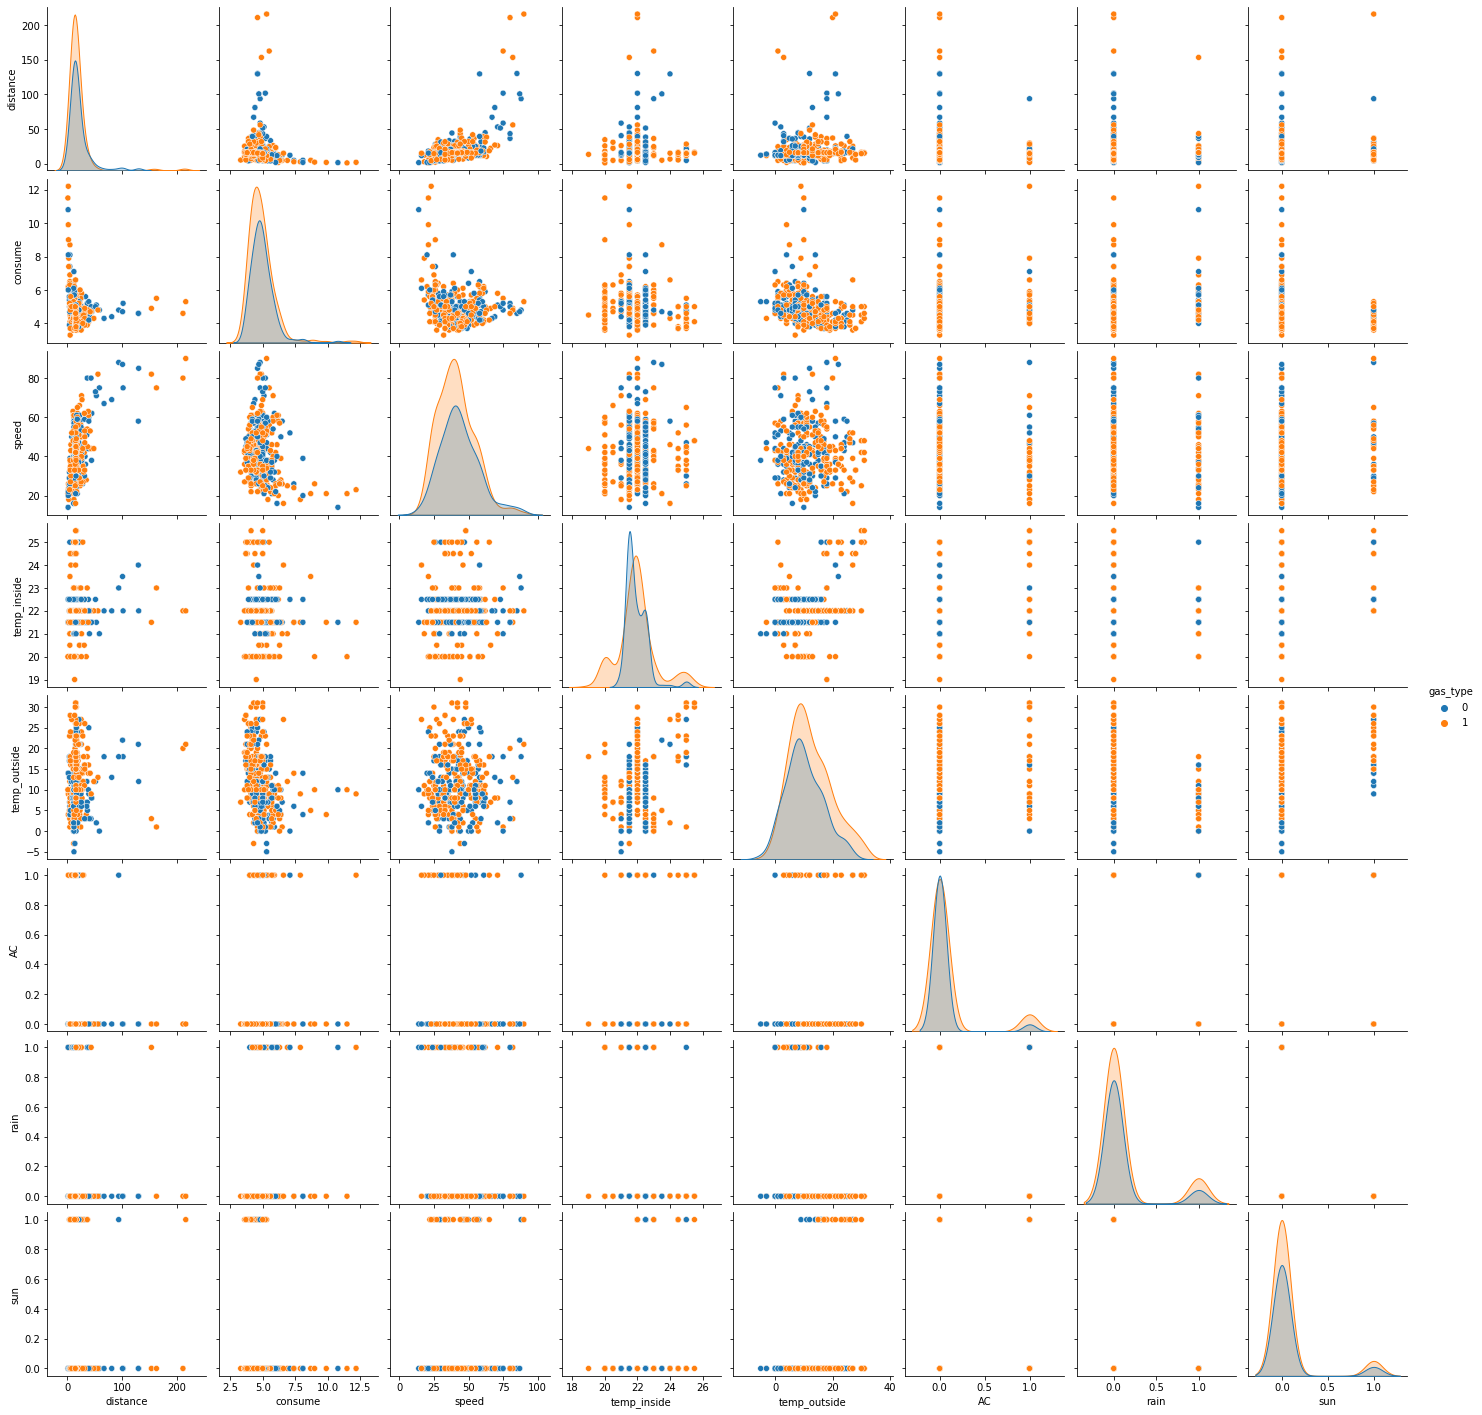

In [ ]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.pairplot(df, hue = "gas_type")

### Correlation Map

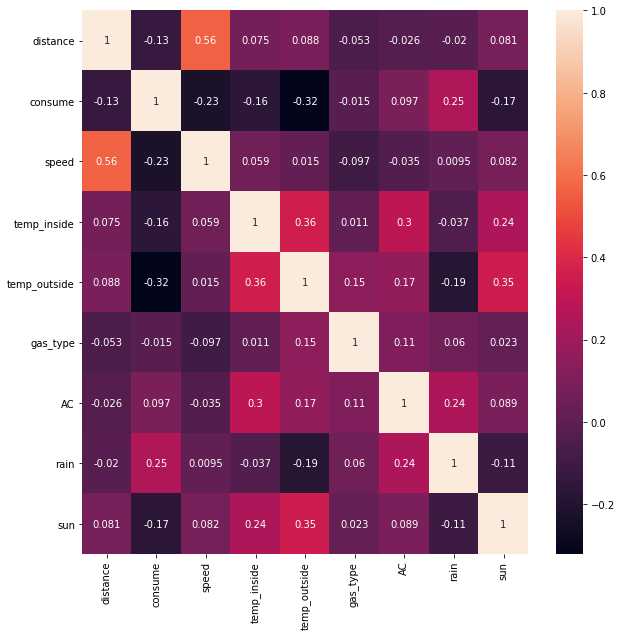

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))

sns.heatmap(df.corr(), annot = True)

### Gistogram

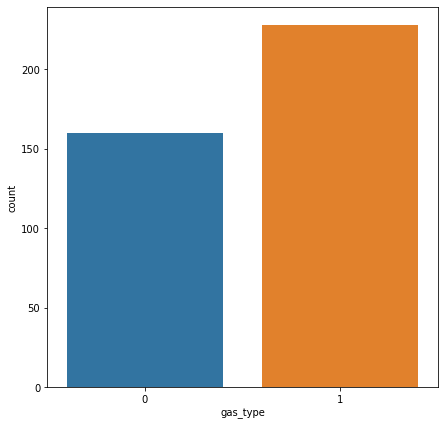

In [ ]:
plt.figure(figsize = (7, 7))
sns.countplot(df["gas_type"])

## Splitting data

In [ ]:
from sklearn.model_selection import train_test_split


- Split by 90:10 due to lack of data

In [ ]:
x_classify = df.drop(["gas_type"], axis=1)
y_classify = df["gas_type"].values

x_regression = df.drop(["distance"], axis=1)
y_regression = df["distance"].values

x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(x_classify, 
                                                            y_classify, 
                                                            test_size=0.1, 
                                                            shuffle=True)

x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_regression, 
                                                            y_regression, 
                                                            test_size=0.1, 
                                                            shuffle=True)

# Training

## Classify: Choose fuel type for car

### Classify gas type, choosing best model
- XGB allow to see most important properties
- KNeighbors good due to lack of data
- Tree just good for this

#### XGBoostClassifier

In [ ]:
from xgboost import XGBClassifier, plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
estims = [100, 200, 300]
train_score_xgb = list()
test_score_xgb = list()
for est in estims:
  xgb = XGBClassifier(n_estimators=est, verbosity=1)
  xgb.fit(x_train_c, y_train_c)
  train_score_xgb.append(xgb.score(x_train_c, y_train_c))
  test_score_xgb.append(xgb.score(x_test_c, y_test_c))
  print(classification_report(y_test_c, xgb.predict(x_test_c)))

              precision    recall  f1-score   support

           0       0.43      0.46      0.44        13
           1       0.72      0.69      0.71        26

    accuracy                           0.62        39
   macro avg       0.57      0.58      0.58        39
weighted avg       0.62      0.62      0.62        39

              precision    recall  f1-score   support

           0       0.40      0.46      0.43        13
           1       0.71      0.65      0.68        26

    accuracy                           0.59        39
   macro avg       0.55      0.56      0.55        39
weighted avg       0.61      0.59      0.60        39

              precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.75      0.69      0.72        26

    accuracy                           0.64        39
   macro avg       0.61      0.62      0.61        39
weighted avg       0.66      0.64      0.65        39



In [ ]:
print(train_score_xgb)
print(test_score_xgb)

[0.8681948424068768, 0.9283667621776505, 0.9656160458452722]
[0.6153846153846154, 0.5897435897435898, 0.6410256410256411]


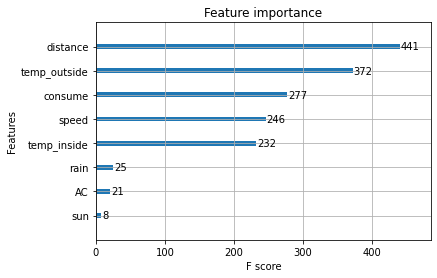

In [ ]:
plot_importance(xgb)

#### KNeighbors Classifier

In [ ]:
neighbors = [3, 6, 9]
train_score_knb = list()
test_score_knb = list()
for n in neighbors:
  knb = KNeighborsClassifier(n_neighbors=n)
  knb.fit(x_train_c, y_train_c)
  train_score_knb.append(knb.score(x_train_c, y_train_c))
  test_score_knb.append(knb.score(x_test_c, y_test_c))
  print(classification_report(y_test_c, knb.predict(x_test_c)))

              precision    recall  f1-score   support

           0       0.38      0.46      0.41        13
           1       0.70      0.62      0.65        26

    accuracy                           0.56        39
   macro avg       0.54      0.54      0.53        39
weighted avg       0.59      0.56      0.57        39

              precision    recall  f1-score   support

           0       0.37      0.54      0.44        13
           1       0.70      0.54      0.61        26

    accuracy                           0.54        39
   macro avg       0.53      0.54      0.52        39
weighted avg       0.59      0.54      0.55        39

              precision    recall  f1-score   support

           0       0.33      0.31      0.32        13
           1       0.67      0.69      0.68        26

    accuracy                           0.56        39
   macro avg       0.50      0.50      0.50        39
weighted avg       0.56      0.56      0.56        39



In [ ]:
print(train_score_knb)
print(test_score_knb)

[0.7908309455587392, 0.7249283667621776, 0.6962750716332379]
[0.5641025641025641, 0.5384615384615384, 0.5641025641025641]


#### Decision Tree Classifier

In [ ]:
leafs = [3, 5, 9]
train_score_dtc = list()
test_score_dtc = list()
for n in leafs:
  dtc = DecisionTreeClassifier()
  dtc.fit(x_train_c, y_train_c)
  train_score_dtc.append(dtc.score(x_train_c, y_train_c))
  test_score_dtc.append(dtc.score(x_test_c, y_test_c))
  print(classification_report(y_test_c, dtc.predict(x_test_c)))

              precision    recall  f1-score   support

           0       0.27      0.31      0.29        13
           1       0.62      0.58      0.60        26

    accuracy                           0.49        39
   macro avg       0.45      0.44      0.44        39
weighted avg       0.51      0.49      0.50        39

              precision    recall  f1-score   support

           0       0.35      0.46      0.40        13
           1       0.68      0.58      0.62        26

    accuracy                           0.54        39
   macro avg       0.52      0.52      0.51        39
weighted avg       0.57      0.54      0.55        39

              precision    recall  f1-score   support

           0       0.28      0.38      0.32        13
           1       0.62      0.50      0.55        26

    accuracy                           0.46        39
   macro avg       0.45      0.44      0.44        39
weighted avg       0.51      0.46      0.48        39



In [ ]:
print(train_score_dtc)
print(test_score_dtc)

[1.0, 1.0, 1.0]
[0.48717948717948717, 0.5384615384615384, 0.46153846153846156]


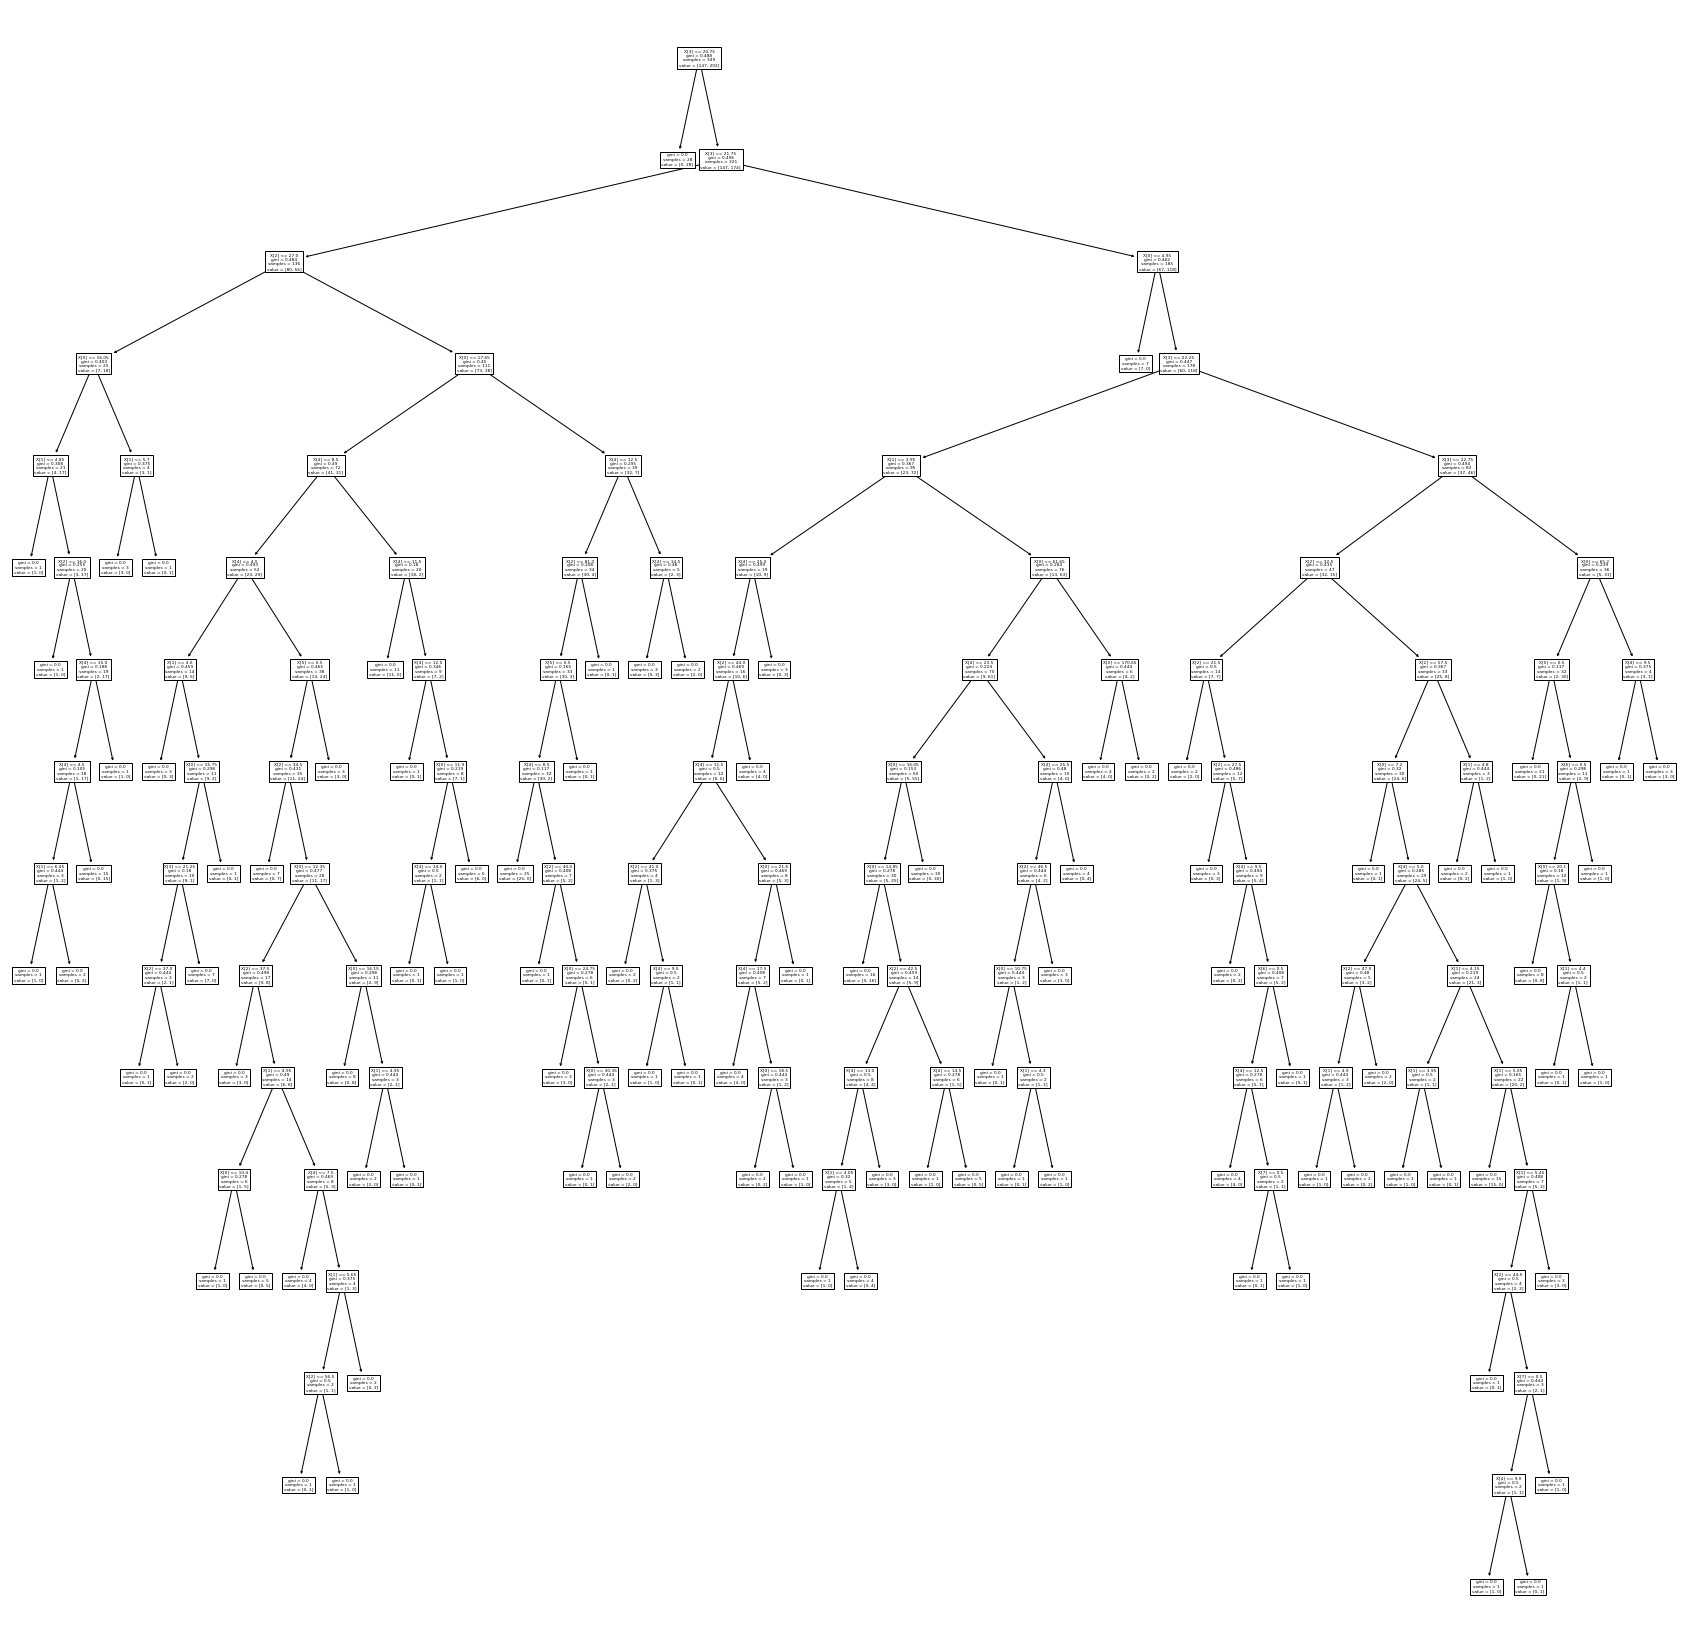

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (30, 30))
plot_tree(dtc)
plt.show()

### Results

- XGBoost Clssifier = 76.92%
- KNeighbors Classifier = 58.97%
- Decision Tree Classifier = 71.79%

Best model is `XGBoost` Clssifier


## Regression: Predict distance

 ### predict distance by data that we have 

In [ ]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor


#### Linear Regression

In [ ]:
lr = LinearRegression(fit_intercept=False)
lr.fit(x_train_r, y_train_r)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [ ]:
lr.score(x_test_r, y_test_r)

0.368688214226244

#### SGD Regressor

In [ ]:
sgd = SGDRegressor(alpha = 0.0000002)
sgd.fit(x_train_r, y_train_r)

SGDRegressor(alpha=2e-07, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd.score(x_test_r, y_test_r)

-3.191995502885471e+18

#### Gradient Boosting Regression

In [ ]:
grb = GradientBoostingRegressor()
grb.fit(x_train_r, y_train_r)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
grb.score(x_test_r, y_test_r)

0.8029533004427634

In [ ]:
import numpy as np
to_pred = np.array([[6.3, 55, 21.5, 15.0, 0, 1, 0, 0]])
grb_predict = grb.predict(to_pred)

In [ ]:
grb_predict

array([8.79435249])

### Results
- Linear Regression = 36%
- SGD Regression = -319%
- Gradient Boosting Regression = 80%

Best Model is `Gradient Boosting Regression`

# Conclusion

- We have pre-processed data
- - Deleted columns that have lack of non-null data
- - Cast all types into numerical types
- Make visualisations by:
- - Scattered Matrix to search for classification target
- - Correlation Heat Map to look how data correlates with each other
- - Gistogram to see what type of fuel is prefered by peolpe
- Split our data to train and test slices
- Train our models:
- - Classify gas type preference by other data with:
- - - XGBoosting Method: get 76.92% accuracy
- - - Kneighbors Method: get 58.97% accuracy
- - - Decision Tree Method: get 71.79% accuracy
- - Regression Learning to predict distance by external parameters:
- - - Linear Method: got prediction with 36% accuracy
- - - SGD Method: got prediction with -319% accuracy
- - - Gradien Boosting Method: got prediction with 80% accuracy
- Chosen best models:
- - In Classifier best model is XGBoosting 
- - In Regression best model is Gradient Boosting
